# Activité - Analyse bivariée de l'échantillon Iris

In [4]:
# -*- coding: utf-8 -*-

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st
import statsmodels.formula.api as sm

# Chargement
iris = pd.read_csv("E:\\Data\\RawData\\NettoyageDonnees\\iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
#sns.pairplot(iris_dna,hue="species")

# Création des sous catégories
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

iris : 150 individus, iris_dna : 146 individus


## Question n ° 1

In [2]:
# Calcul des coefficients linéaires :
# petal_width en fonction de petal_length
coeffRelation1 = st.pearsonr(iris_dna["petal_width"],iris_dna["petal_length"])[0]
# sepal_width en fonction de petal_width
coeffRelation2 = st.pearsonr(iris_dna["sepal_width"],iris_dna["petal_width"])[0]

print('Coefficient de corrélation largeur pétale - longueur pétale : {}'.format(coeffRelation1.__round__(3)))
print('Coefficient de corrélation largeur sépale - largeur pétale : {}'.format(coeffRelation2.__round__(3)))


Coefficient de corrélation largeur pétale - longueur pétale : 0.942
Coefficient de corrélation largeur sépale - largeur pétale : -0.248


## Question n° 2

In [ ]:
# Le coefficient de corrélation entre largeur et longueur de pétale est élevé car proche de 1 (0.942)
# Cela signifie que la variable largeur de pétale est très bien expliquée par la variable longueur de pétale
# Ce que confirme le premier diagramme qui montre la distribution des points ramassée le long d'une droite

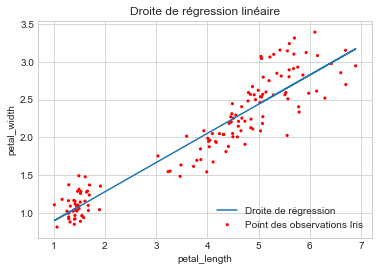

In [5]:
def Afficher_Courbe_Regression(abscisse,ordonnee,prediction, labelX,labelY):
        plt.style.use('seaborn-whitegrid')
        plan = plt.figure()
        axes = plt.axes()
        
        axes.plot(abscisse,prediction,label='Droite de régression')
        axes.scatter(abscisse,ordonnee,s=10,c='red',marker='o',edgecolor='none',label='Point des observations Iris')

        # Définition des légendes
        plt.title("Droite de régression linéaire")
        plt.legend(loc='lower right');
        axes = axes.set(xlabel=labelX, ylabel=labelY)  

regression = sm.ols(formula='petal_width ~ petal_length',data=iris_dna).fit()
prediction = regression.params['petal_length'] * iris_dna.petal_length + regression.params['Intercept'] 

Afficher_Courbe_Regression(iris_dna.petal_length,
                           iris_dna.petal_width,
                           prediction,
                           'petal_length',
                           'petal_width')

In [ ]:
# Et ce que montre bien le tracé de la droite de régression correspondante modélisant la corrélation linéaire entre
# largeur et longueur d'un pétale d'iris...

In [ ]:
# Ce qui n'est pas le cas entre la largeur du sépale et la largeur du pétale
# Le coefficient de corrélation linéaire entre les 2 attributs est faible (-0.248) et négatif de surcroit
# Ce que confirme le nuage de points très dispersé qui ne semble pas suivre de distribution linéaire

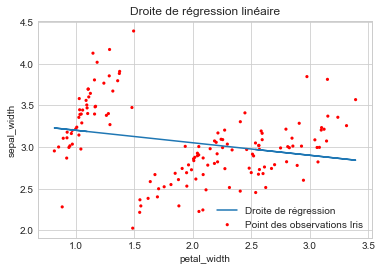

In [7]:
regression = sm.ols(formula='sepal_width ~ petal_width',data=iris_dna).fit()
prediction = regression.params['petal_width'] * iris_dna.petal_width + regression.params['Intercept'] 

Afficher_Courbe_Regression(iris_dna.petal_width,
                           iris_dna.sepal_width,
                           prediction,
                           'petal_width',
                           'sepal_width')

In [ ]:
# La droite de régression ne semble pas particulièrement résumer le nuage de points

## Question 2 - Bis

In [ ]:
# On Constate néanmoins que lorsque l'on segmente les données par variété d'Iris
# Les largeurs de pétale et de sépale paraissent beaucoup plus corrélées
# Ce que montre les coefficients linéaires intra classes beaucoup plus élevées (0.75, 0.68, 0.82)
# Ce qui signifie que les attributs largeurs et longueurs de pétale sont dépendants de l'espèce d'iris...

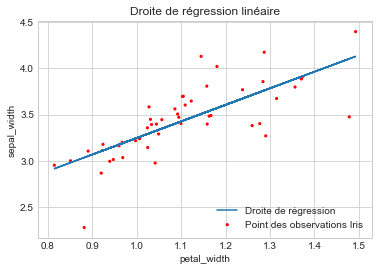

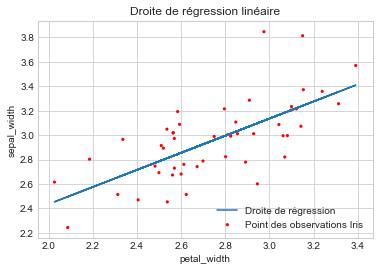

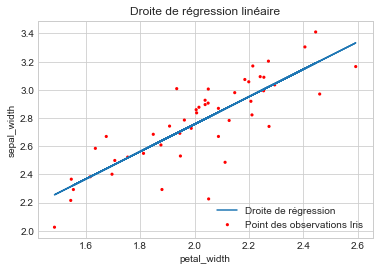

In [8]:
def Afficher_Regresion_Espece(Espece):
    regression = sm.ols(formula='sepal_width ~ petal_width',data=Espece).fit()
    prediction = regression.params['petal_width'] * Espece.petal_width + regression.params['Intercept'] 

    Afficher_Courbe_Regression(Espece.petal_width,
                           Espece.sepal_width,
                           prediction,
                           'petal_width',
                           'sepal_width')

Afficher_Regresion_Espece(iris_setosa)
Afficher_Regresion_Espece(iris_virginica)
Afficher_Regresion_Espece(iris_versicolor)

In [ ]:
# Ce que confirme bien les droites de regression tracées pour chacune des 3 espèces d'iris
# Il y a bien une variance interclasse importante sur les différentes espèces d'iris
# Ce que ne pouvait pas montrer le coefficient de corrélation calculé pour tous les iris !!

## Question 3

La droite de régression a pour équation : petal_width = -0.15 * petal_length + 3.352 


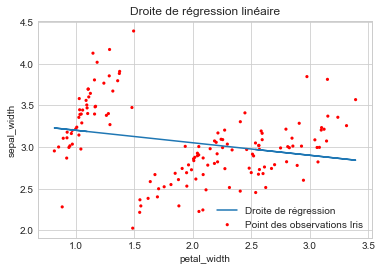

In [12]:
# cas 1/ X est la variable petal_length et Y la variable petal_width, sur le dataframe iris_dna

regression = sm.ols(formula='sepal_width ~ petal_width',data=iris_dna).fit()
prediction = regression.params['petal_width'] * iris_dna.petal_width + regression.params['Intercept'] 

print('La droite de régression a pour équation : {} = {} * {} + {} '.format('petal_width',regression.params['petal_width'].__round__(3),'petal_length',regression.params['Intercept'].__round__(3)))

Afficher_Courbe_Regression(iris_dna.petal_width,
                           iris_dna.sepal_width,
                           prediction,
                           'petal_width',
                           'sepal_width')


La droite de régression a pour équation : sepal_width = 1.788 * petal_width + 1.459 


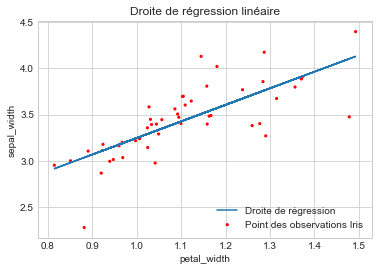

In [13]:
# cas 2/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_setosa

def Regresion_Espece(Espece, Explique, Explicatif):
    regression = sm.ols(formula='sepal_width ~ petal_width',data=Espece).fit()
    prediction = regression.params['petal_width'] * Espece.petal_width + regression.params['Intercept'] 

    print('La droite de régression a pour équation : {} = {} * {} + {} '.format(Explique,
                                                                                regression.params['petal_width'].__round__(3),
                                                                                Explicatif,
                                                                                regression.params['Intercept'].__round__(3)))

    Afficher_Courbe_Regression(Espece.petal_width,
                           Espece.sepal_width,
                           prediction,
                           'petal_width',
                           'sepal_width')

Regresion_Espece(iris_setosa,'sepal_width','petal_width')


La droite de régression a pour équation : sepal_width = 0.699 * petal_width + 1.038 


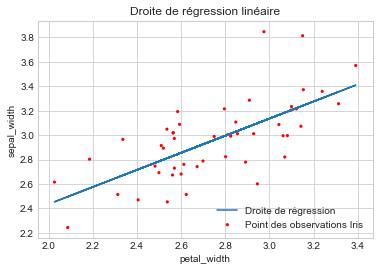

In [14]:
# cas 3/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_virginica

Regresion_Espece(iris_virginica,'sepal_width','petal_width')


La droite de régression a pour équation : sepal_width = 0.974 * petal_width + 0.809 


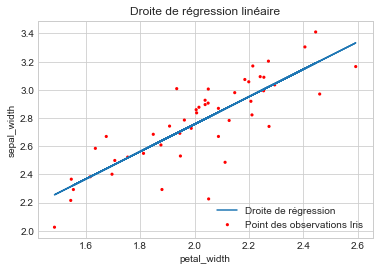

In [15]:
# cas 4/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_versicolor

Regresion_Espece(iris_versicolor,'sepal_width','petal_width')

## Question 4

In [ ]:
# Voici le code après complétion des passages manquants pour permettre de calculer les valeurs nulles :

In [16]:
############ Question 4 ###########################################################

def Coefficient_Regresion_sepal_petal(Espece):
    regression = sm.ols(formula='sepal_width ~ petal_width',data=Espece).fit()
    
    return regression.params['petal_width'].__round__(3)
    
def Interception_Regression_sepal_petal(Espece):
    regression = sm.ols(formula='sepal_width ~ petal_width',data=Espece).fit()
    
    return regression.params['Intercept'].__round__(3)    

def Coefficient_Regresion_petal_sepal(Espece):
    regression = sm.ols(formula='petal_width ~ sepal_width',data=Espece).fit()
    
    return regression.params['sepal_width'].__round__(3)
    
def Interception_Regression_petal_sepal(Espece):
    regression = sm.ols(formula='petal_width ~ sepal_width',data=Espece).fit()
    
    return regression.params['Intercept'].__round__(3)    

coeffs = {    
    "cas 1" : {'a': [Coefficient_Regresion_petal_sepal(iris_versicolor)] , 'b':[Interception_Regression_petal_sepal(iris_versicolor)]},
    "cas 2" : {'a': [Coefficient_Regresion_sepal_petal(iris_setosa)] , 'b':[Interception_Regression_sepal_petal(iris_setosa)]},
    "cas 3" : {'a': [Coefficient_Regresion_sepal_petal(iris_versicolor)] , 'b':[Interception_Regression_sepal_petal(iris_versicolor)]},
    "cas 4" : {'a': [Coefficient_Regresion_sepal_petal(iris_virginica)] , 'b':[Interception_Regression_sepal_petal(iris_virginica)]}
}

lignes_modifiees = []

for (i,individu) in iris_dna.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        
        if(espece=='setosa'):
            a = coeffs["cas 2"]['a']
            b = coeffs["cas 2"]['b']
        
        if(espece=='versicolor'):
            a = coeffs["cas 3"]['a']
            b = coeffs["cas 3"]['b']
        
        if(espece=='virginica'):
            a = coeffs["cas 4"]['a']
            b = coeffs["cas 4"]['b']
        
        Y = a*X + b
        iris.loc[i,"sepal_width"] = Y # on remplace la valeur manquante par Y
        
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
